# Plotting with Astroplan

Say we want to look at the Summer Triangle (Altair, Deneb, and Vega) using the Subaru Telescope.

First, we define our Observer object:

In [3]:
from astroplan import Observer
subaru = Observer.at_site('subaru')

In [4]:
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget

In [6]:
altair = FixedTarget.from_name('Altair')
vega = FixedTarget.from_name('Vega')

For objects that can’t be resolved with from_name, you can enter coordinates manually:

In [7]:
coordinates = SkyCoord('20h41m25.9s', '+45d16m49.3s', frame='icrs')
deneb = FixedTarget(name='Deneb', coord=coordinates)

We also have to define a Time (in UTC) at which we wish to observe. Here, we pick 2AM local time, which is noon UTC during the summer:

In [9]:
from astropy.time import Time
time = Time('2017-12-25 12:00:00')
subaru.target_is_up(time, altair)

False

Targets are visible from Subaru at the time we settled on, mostly in Summer.

In [86]:
time = Time('2016-06-25 12:00:00')
subaru.target_is_up(time, altair)

True

To get a general idea of our targets’ airmass on the night of observation, we can plot it over the course of the night.

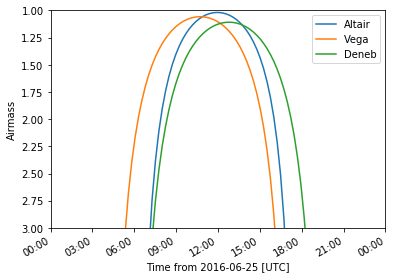

In [87]:
from astroplan.plots import plot_airmass
import matplotlib.pyplot as plt
%matplotlib inline

plot_airmass(altair, subaru, time)
plot_airmass(vega, subaru, time)
plot_airmass(deneb, subaru, time)

plt.legend(loc=1, bbox_to_anchor=(1, 1))
plt.show() 